In [124]:
from torch.utils.data import Dataset

In [125]:
class NumbersDataset(Dataset):
    def __init__(self, low, high):
        self.samples = list(range(low, high))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

In [126]:
dataset = NumbersDataset(100, 400)
print('Length: ', len(dataset))
print('Sample: ', dataset[10:16])

Length:  300
Sample:  [110, 111, 112, 113, 114, 115]


In [127]:
from torch.utils.data import DataLoader

#### Loader

In [128]:
dataloader = DataLoader(dataset, batch_size=40, shuffle=True)

for i, batch in enumerate(dataloader):
    print(i, batch)

0 tensor([264, 147, 314, 261, 153, 331, 220, 229, 185, 393, 122, 120, 307, 196,
        112, 359, 143, 258, 377, 397, 375, 204, 214, 138, 360, 363, 351, 206,
        191, 267, 298, 386, 249, 390, 224, 387, 103, 317, 381, 342])
1 tensor([118, 108, 336, 332, 232, 219, 333, 134, 392, 368, 316, 339, 195, 270,
        248, 335, 344, 266, 240, 218, 216, 280, 193, 274, 210, 295, 109, 297,
        100, 303, 289, 315, 277, 350, 357, 372, 225, 257, 269, 309])
2 tensor([380, 290, 291, 157, 208, 319, 370, 327, 129, 273, 141, 250, 399, 205,
        247, 285, 246, 128, 161, 227, 272, 271, 192, 252, 318, 162, 245, 296,
        160, 348, 334, 253, 211, 164, 116, 305, 230, 151, 207, 110])
3 tensor([376, 102, 323, 125, 356, 233, 126, 340, 167, 101, 259, 178, 260, 343,
        145, 121, 155, 301, 135, 115, 374, 283, 139, 282, 330, 329, 154, 105,
        362, 382, 213, 364, 114, 284, 107, 300, 144, 311, 131, 366])
4 tensor([292, 308, 169, 239, 124, 244, 149, 179, 321, 358, 310, 177, 388, 369,
        337,

In [129]:
import matplotlib.pyplot as plt
import cv2

plt.style.use('dark_background')

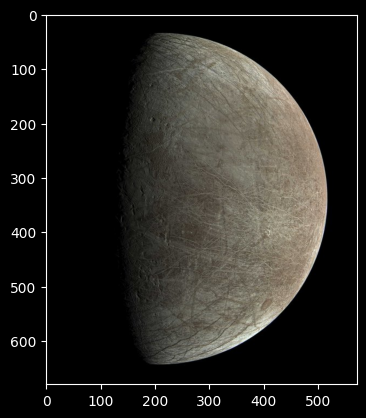

In [130]:
dt = cv2.imread('data/moon.jpg')
dt = cv2.cvtColor(dt, cv2.COLOR_RGB2BGR)
#plt.axis('off')
plt.imshow(dt)

In [131]:
from torch.utils.data import Dataset
import os

In [132]:
class ImgDataset(Dataset):
    def __init__(self, path='data', transform=None):
        self.path = path
        self.samples = [el for el in os.listdir(self.path) if el.endswith('.jpg')]
        print(self.samples)
        if transform is None:
            self.should_transform = False
        else:
            self.transform = transform
            self.should_transform = True

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path = os.path.join(self.path, self.samples[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        if self.should_transform:
            img_transformed = self.transform(img)
        else:
            img_transformed = img

        return {'image': img_transformed, 'type': 'satellites'}

['moon.jpg']


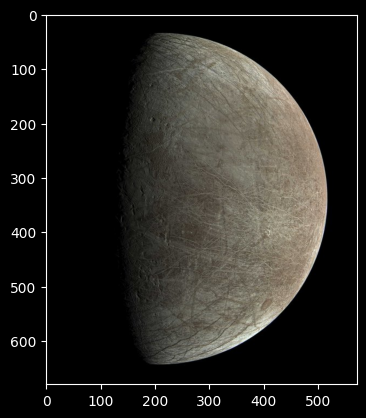

In [133]:
dataset = ImgDataset()
plt.imshow(dataset[0]['image'])
plt.show()

#### Transformation

In [134]:
from torchvision import transforms, utils

In [135]:
img = dataset[0]['image']
scale_factor = 0.2
img_size = dataset[0]['image'].shape[:2]

scaled_size = (int(img_size[0]*scale_factor), int(img_size[1]*scale_factor))
crop_size = (10, 10)

In [136]:
data_transform_list = [
    transforms.ToPILImage(),
    transforms.Resize(scaled_size),
    #transforms.CenterCrop(crop_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]

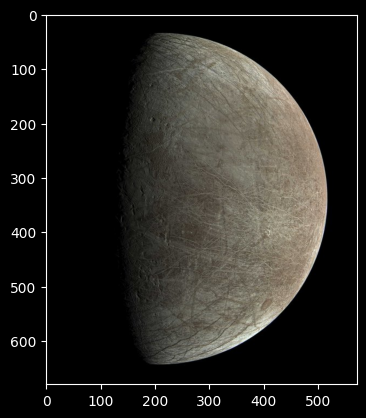

In [137]:
pil_img = data_transform_list[0](img)
plt.imshow(pil_img)
plt.show()

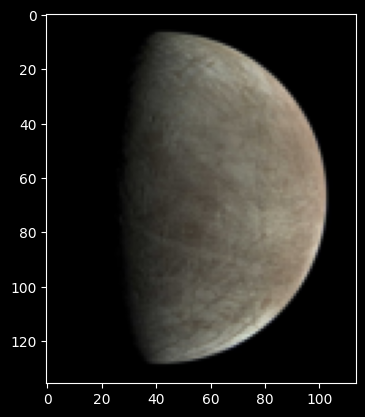

In [138]:
plt.imshow(data_transform_list[1](pil_img))
plt.show()

In [139]:
# plt.imshow(data_transform_list[2](pil_img))
# plt.show()

In [140]:
transform = transforms.Compose(data_transform_list)

In [145]:
transform(img).permute(2, 1, 0)

tensor([[[-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         ...,
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044]],

        [[-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         ...,
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044]],

        [[-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         ...,
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044]],

        ...,

        [[-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         ...,
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044],
         [-2.1179, -2.0357, -1.8044]],

        [[

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


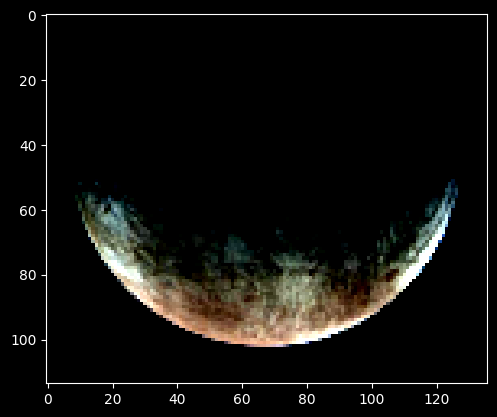

In [146]:
plt.imshow(transform(img).permute(2, 1, 0).numpy())
plt.show()

#### Augmentation

In [149]:
data_augmentation_list = [
    transforms.RandomRotation(30),
    transforms.RandomCrop((200, 200)),
    transforms.RandomHorizontalFlip()
]

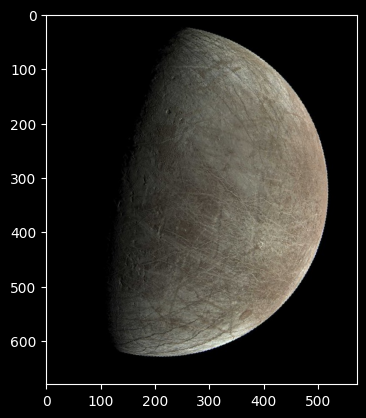

In [161]:
plt.imshow(data_augmentation_list[0](pil_img))
plt.show()

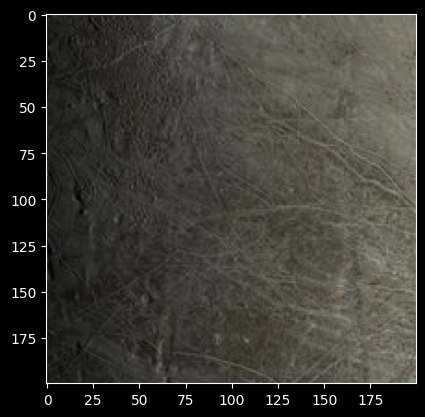

In [157]:
plt.imshow(data_augmentation_list[1](pil_img))
plt.show()

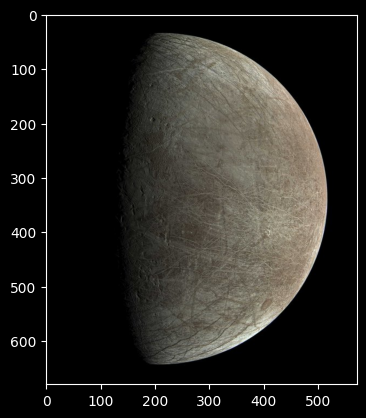

In [166]:
plt.imshow(data_augmentation_list[2](pil_img))
plt.show()

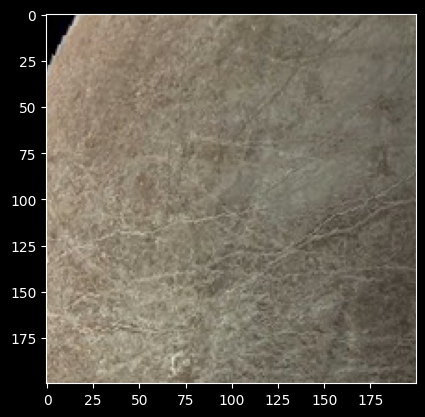

In [169]:
transform = transforms.Compose(data_augmentation_list)
plt.imshow(transform(pil_img))
plt.show()